In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D,Flatten, Activation, BatchNormalization, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist, cifar10 # 灰階圖資

In [2]:
# global setting
EPOCHS = 30
IMG_SHAPE =(32,32,3)
CLS = 10
BSIZE = 256
LEARN_RATE = 0.001
L2 = 0.005

In [3]:
path = 'mnist.npz'
with np.load(path, allow_pickle=True) as f:
    x_train, y_train = f['x_train'], f['y_train']
    x_test, y_test = f['x_test'], f['y_test']

In [4]:
# Translation of data  
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')  
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')
# Standardize feature data  
x_train = x_train / 255  
x_test = x_test /255  

print(x_train.shape, x_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [5]:
# # Standardization
# x_train = x_train.astype('float') / 255.0
# x_test = x_test.astype('float')  / 255.0

# # 將二維的 28*28 的資料拉直 變成 784  (reshape)
# print(f'Before reshape {x_train.shape}')
# x_train = x_train.reshape(60000,28*28)
# print(f'After reshape {x_train.shape}')
# x_test=x_test.reshape(x_test.shape[0],-1) # -1 請 python 幫你計算 I don't care
# print(f'After reshape {x_test.shape}')

In [6]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)


In [7]:
model2 = Sequential()

# 第一層捲積
model2.add(Conv2D(filters =16, 
                  kernel_size=(3,3),
                  padding = 'same', 
                  input_shape=(28,28,1), 
                  activation='relu'))

# 第一層pooling
model2.add(MaxPooling2D(pool_size=(2,2)))

# 第二層捲積
model2.add(Conv2D(filters =32,
                  kernel_size=(3,3),
                  padding='same',  
                  input_shape=(28,28,1),  
                  activation='relu'))

# 第二層pooling
model2.add(MaxPooling2D(pool_size=(2,2)))

# Flattern
model2.add(Flatten())

# DNN
model2.add(Dense(128, activation='relu'))

# add output layer , since its a multiclassification , we use softmax
model2.add(Dense(10, activation='softmax'))
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [8]:
# compile
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
h2 = model2.fit(x_train, y_train, batch_size = 300, epochs=15)

Epoch 1/15
200/200 [==============================] - 4s 22ms/step - loss: 0.3838 - accuracy: 0.8913
Epoch 2/15
200/200 [==============================] - 5s 23ms/step - loss: 0.0866 - accuracy: 0.9743
Epoch 3/15
200/200 [==============================] - 5s 24ms/step - loss: 0.0594 - accuracy: 0.9820
Epoch 4/15
200/200 [==============================] - 6s 29ms/step - loss: 0.0459 - accuracy: 0.9859
Epoch 5/15
200/200 [==============================] - 5s 26ms/step - loss: 0.0382 - accuracy: 0.9880
Epoch 6/15
200/200 [==============================] - 5s 24ms/step - loss: 0.0302 - accuracy: 0.9911
Epoch 7/15
200/200 [==============================] - 5s 23ms/step - loss: 0.0258 - accuracy: 0.9921
Epoch 8/15
200/200 [==============================] - 5s 24ms/step - loss: 0.0223 - accuracy: 0.9932
Epoch 9/15
200/200 [==============================] - 5s 24ms/step - loss: 0.0186 - accuracy: 0.9942
Epoch 10/15
200/200 [==============================] - 5s 26ms/step - loss: 0.0151 - accura

<Axes: >

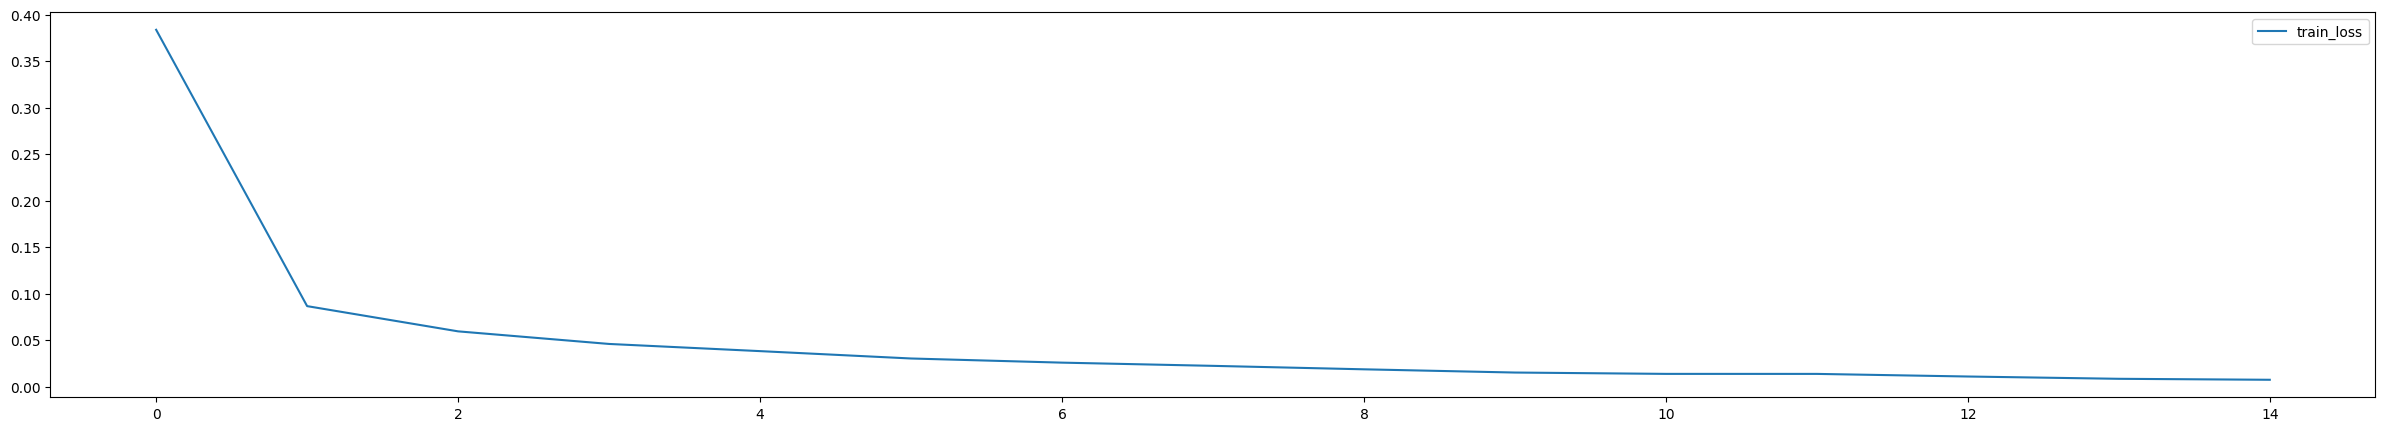

In [12]:
plt.figure(figsize=(30,5))

sns.lineplot(x=range(15), y=h2.history['loss'], label='train_loss')